In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento


/content/gdrive/.shortcut-targets-by-id/13aHaot6tbm7SROiS_JzQgfDtjZ_DM4PH/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento


In [ ]:
!ls /content/gdrive/My\ Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento/*

***FUNCION HISTOGRAMA***

In [ ]:
def histogram(imgGRAY):
    #histograma
    hist = cv.calcHist([imgGRAY],[0],None,[256],[0,256])
    # return the histogram
    return hist.flatten()

***LECTURA DEL DATASET***

In [ ]:
import dlib, cv2, os
import numpy as np
from skimage import io, color
import cv2 as cv
from matplotlib import pyplot as plt


import cv2
#CREACION DE ARCHIVOS CSV CON LAS CARACTERISTICAS
histogram_dataset= open("histogram_dataset.csv", "w+") #Caracteristicas imagenes eigen
histogram_etiquetas_dataset= open("histogram_etiquetas_dataset.csv", "w+") #rutas de las imagenes eigen con el nombre de la imagen
original_etiquetas_dataset= open("original_etiquetas_dataset.csv", "w+") #rutas de las imagenes originales del dataset

# Estas carpetas estan en My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento
path_entrada_dataset = '00_EIGEN_PRUEBA' #1
path_dataset = 'DATASET_PERROS' #1


#print(os.listdir(path_entrada))
cont_imagen_entrada=0
#For que recorre las carpetas(sujetos) del path
for aa in os.listdir(path_entrada_dataset):
    if '.jpg' or '.png' or '.jpeg' in os.listdir(path_entrada_dataset + '/' + aa):
      #For que recorre la imagen de cada carpeta(sujeto)
      for f in os.listdir(path_entrada_dataset + '/' + aa):

        cont_imagen_entrada=cont_imagen_entrada+1
        #aa Carpeta del sujeto 
        #f Nombre de la imagen del sujeto
        #Ruta de la imagen
        imgPath = path_entrada_dataset + '/' + aa + '/' + f
        #Guarda en el archivo
        histogram_etiquetas_dataset.write(imgPath)
        histogram_etiquetas_dataset.write("\n")

        #Ruta de la imagen Original
        imgPath2 = path_dataset + '/' + aa + '/' + f

        original_etiquetas_dataset.write(imgPath2)
        original_etiquetas_dataset.write("\n")

        #Abrir Imagen (Lee la imagen en formtado BGR)
        imgBGR = cv2.imread(imgPath)

        #Convertir una imagen a GRIS
        imgGRAY= color.rgb2gray(io.imread(imgPath))

        #Datos de la Imagen
        height, width = imgGRAY.shape
        total=(height*width)

        #Grafica Histograma el Histograma
        # plt.hist(imgGRAY.ravel(),256,[0,256]); plt.show()
        
        #Llama la funcion y almacenalos valores en el archivo 
        fv_hist = histogram(imgGRAY)
        i=0
        for b in fv_hist:
          i=i+1
          histogram_dataset.write("%.20f" % float(b))
          if(i<=(len(fv_hist)-1)):
            histogram_dataset.write(",")
        histogram_dataset.write("\n")

print("La imagen ha sido PROCESADA!! ", cont_imagen_entrada)
print("TERMINO !!!!!")

La imagen ha sido PROCESADA!!  544
TERMINO !!!!!


In [ ]:
import pandas as pd

lectura_histograma_dataset = pd.read_csv("histogram_dataset.csv", header= None)
lab_dataset = pd.read_csv("histogram_etiquetas_dataset.csv",header=None ,dtype=str)
lab_dataset_original = pd.read_csv("original_etiquetas_dataset.csv",header=None ,dtype=str)

df = pd.concat([lab_dataset,lab_dataset_original,lectura_histograma_dataset],axis=1)
df.to_csv("caracteristicas_globales_dataset.csv",index=None, header=None)
df

,0,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,560.0,44.0,32.0,34.0,49.0,37.0,32.0,32.0,34.0,33.0,40.0,52.0,42.0,37.0,48.0,51.0,60.0,63.0,62.0,75.0,70.0,72.0,90.0,71.0,119.0,113.0,106.0,123.0,122.0,157.0,142.0,146.0,153.0,184.0,178.0,187.0,177.0,191.0,...,95.0,97.0,83.0,84.0,69.0,89.0,96.0,92.0,85.0,81.0,78.0,87.0,84.0,96.0,86.0,67.0,68.0,71.0,68.0,55.0,51.0,69.0,49.0,52.0,58.0,50.0,48.0,41.0,31.0,32.0,32.0,19.0,20.0,17.0,18.0,13.0,13.0,8.0,7.0,15.0
1,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,1648.0,111.0,101.0,98.0,109.0,128.0,120.0,110.0,126.0,148.0,150.0,157.0,168.0,161.0,206.0,169.0,218.0,232.0,187.0,198.0,205.0,226.0,192.0,241.0,204.0,213.0,188.0,175.0,226.0,220.0,212.0,194.0,197.0,174.0,187.0,194.0,171.0,191.0,...,39.0,35.0,54.0,42.0,37.0,46.0,41.0,41.0,41.0,34.0,41.0,41.0,31.0,45.0,28.0,19.0,26.0,22.0,24.0,14.0,11.0,11.0,15.0,5.0,13.0,10.0,8.0,7.0,8.0,10.0,7.0,10.0,11.0,9.0,11.0,9.0,9.0,5.0,11.0,24.0
2,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,284.0,26.0,36.0,49.0,40.0,64.0,60.0,65.0,51.0,61.0,72.0,64.0,69.0,48.0,53.0,59.0,53.0,59.0,75.0,66.0,65.0,67.0,76.0,80.0,64.0,72.0,86.0,86.0,85.0,70.0,85.0,76.0,76.0,95.0,85.0,91.0,103.0,123.0,...,148.0,132.0,136.0,143.0,133.0,146.0,155.0,135.0,126.0,143.0,123.0,135.0,141.0,135.0,138.0,115.0,134.0,119.0,106.0,117.0,126.0,112.0,151.0,121.0,114.0,131.0,95.0,89.0,94.0,112.0,100.0,116.0,84.0,69.0,64.0,58.0,57.0,65.0,72.0,430.0
3,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,5.0,8.0,10.0,13.0,23.0,32.0,44.0,60.0,68.0,78.0,...,46.0,40.0,42.0,35.0,52.0,37.0,34.0,34.0,51.0,50.0,63.0,51.0,49.0,53.0,52.0,50.0,51.0,55.0,49.0,59.0,57.0,59.0,50.0,52.0,46.0,54.0,62.0,59.0,41.0,45.0,35.0,19.0,17.0,10.0,10.0,6.0,2.0,2.0,0.0,0.0
4,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,76.0,16.0,19.0,18.0,17.0,16.0,28.0,32.0,31.0,39.0,31.0,58.0,40.0,40.0,40.0,33.0,44.0,53.0,69.0,49.0,76.0,80.0,92.0,88.0,84.0,104.0,93.0,103.0,98.0,97.0,95.0,90.0,118.0,95.0,96.0,97.0,88.0,93.0,...,84.0,85.0,106.0,113.0,107.0,85.0,92.0,95.0,84.0,94.0,71.0,78.0,75.0,89.0,69.0,72.0,98.0,68.0,83.0,89.0,87.0,74.0,89.0,85.0,87.0,82.0,70.0,86.0,82.0,67.0,89.0,82.0,86.0,82.0,66.0,82.0,65.0,64.0,61.0,1064.0
5,ME_SIMILARIDAD/Zeus-Rekel - Husky/Zeus-Rekel__...,DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__...,173.0,35.0,41.0,33.0,50.0,47.0,44.0,52.0,52.0,49.0,35.0,45.0,48.0,57.0,61.0,52.0,42.0,50.0,59.0,56.0,55.0,54.0,43.0,74.0,69.0,77.0,84.0,96.0,96.0,108.0,100.0,92.0,125.0,103.0,111.0,116.0,118.0,117.0,...,126.0,129.0,105.0,120.0,118.0,100.0,96.0,114.0,112.0,122.0,121.0,119.0,108.0,111.0,102.0,120.0,130.0,113.0,132.0,91.0,89.0,108.0,98.0,107.0,85.0,93.0,71.0,79.0,65.0,56.0,48.0,55.0,60.0,34.0,44.0,39.0,42.0,50.0,46.0,927.0


**LECTURA IMAGEN DE ENTRADA**

In [ ]:
import dlib, cv2, os
import numpy as np
from skimage import io, color
import cv2 as cv
from matplotlib import pyplot as plt


import cv2
#CREACION DE ARCHIVOS CSV CON LAS CARACTERISTICAS
archivo_histograma= open("histogram_entrada.csv", "w+") #caracteristicas histograma de la imagen eigen
archivo_etiquetas= open("histogram_etiquetas.csv", "w+") #ruta de la imagen de entrada


# Estas carpetas estan en My Drive/0_Desarrollo_Tesis/2.Resultados_Preprocesamiento
path_entrada = 'ME_SIMILARIDAD_ENTRADA' #1


cont_imagen_entrada=0
#For que recorre las carpetas(sujetos) del path
for aa in os.listdir(path_entrada):
    if '.jpg' or '.png' in os.listdir(path_entrada + '/' + aa):
      #For que recorre la imagen de cada carpeta(sujeto)
      for f in os.listdir(path_entrada + '/' + aa):

        cont_imagen_entrada=cont_imagen_entrada+1
        #aa Carpeta del sujeto 
        #f Nombre de la imagen del sujeto
        #Ruta de la imagen
        imgPath = path_entrada + '/' + aa + '/' + f
        
        archivo_etiquetas.write(imgPath)
        archivo_etiquetas.write("\n")

        #Abrir Imagen (Lee la imagen en formtado BGR)
        imgBGR = cv2.imread(imgPath)

        #Convertir una imagen a GRIS
        imgGRAY= color.rgb2gray(io.imread(imgPath))

        #Datos de la Imagen
        height, width = imgGRAY.shape
        total=(height*width)

        #Grafica Histograma el Histograma
        # plt.hist(imgGRAY.ravel(),256,[0,256]); plt.show()
        
        fv_hist = histogram(imgGRAY)
        i=0
        for b in fv_hist:
          i=i+1
          archivo_histograma.write("%.20f" % float(b))
          if(i<=(len(fv_hist)-1)):
            archivo_histograma.write(",")
        archivo_histograma.write("\n")
        
print("La imagen ha sido PROCESADA!! ", cont_imagen_entrada)
print("TERMINO !!!!!")

La imagen ha sido PROCESADA!!  1
TERMINO !!!!!


In [ ]:
import pandas as pd

lectura_histograma = pd.read_csv("histogram_entrada.csv", header= None)
lab = pd.read_csv("histogram_etiquetas.csv",header=None ,dtype=str)

df = pd.concat([lab,lectura_histograma],axis=1)
df.to_csv("caracteristicas_globales.csv",index=None, header=None)
df

,0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,ME_SIMILARIDAD_ENTRADA/ENTRADA/Zeus-Rekel__02-...,76.0,16.0,19.0,18.0,17.0,16.0,28.0,32.0,31.0,39.0,31.0,58.0,40.0,40.0,40.0,33.0,44.0,53.0,69.0,49.0,76.0,80.0,92.0,88.0,84.0,104.0,93.0,103.0,98.0,97.0,95.0,90.0,118.0,95.0,96.0,97.0,88.0,93.0,73.0,...,84.0,85.0,106.0,113.0,107.0,85.0,92.0,95.0,84.0,94.0,71.0,78.0,75.0,89.0,69.0,72.0,98.0,68.0,83.0,89.0,87.0,74.0,89.0,85.0,87.0,82.0,70.0,86.0,82.0,67.0,89.0,82.0,86.0,82.0,66.0,82.0,65.0,64.0,61.0,1064.0


**FUNCIÓN DISTANCIA EUCLIDIANA **

In [ ]:
import math
import numpy as np
#imagen_entrada, imagen_dataset
def euclidean_distance(x,y):
  suma=0
  for j in range(256):
    numx=(int(x[0:255][j]))
    numy=(int(y[0:255][j]))
    elevado=pow(numx-numy,2)
    suma=elevado+suma
  return math.sqrt(suma)

**LLAMADO DE LA FUNCION DISTANCA EUCLIDIANA**

In [ ]:
#Imagen de entrada 
lectura_histograma = pd.read_csv("histogram_entrada.csv", header= None)
lab = pd.read_csv("histogram_etiquetas.csv",header=None ,dtype=str)

#Imagen de DataSet
lectura_histograma_dataset = pd.read_csv("histogram_dataset.csv", header= None)
lab_dataset = pd.read_csv("histogram_etiquetas_dataset.csv",header=None ,dtype=str)
lab_dataset_original = pd.read_csv("original_etiquetas_dataset.csv",header=None ,dtype=str)


#print(lectura_histograma[0:255][0:1]) #[columna][fila]

entrada_imagen=lectura_histograma[0:255][0:1]


resultado=[]
for i in range(6): #730
  dataset_imagen=lectura_histograma_dataset[0:255][(i):(i+1)]
  #Resultados de la distancia euclidiana
  resultado.append(euclidean_distance(entrada_imagen,dataset_imagen))



print(resultado)
print(max(resultado))
pos_min=resultado.index(min(resultado))
print(resultado.index(min(resultado)))

#print(lab_dataset)
#print(lab_dataset_original[0][pos_max]) #[columna][fila]
imagen_resultado=lab_dataset_original[0][pos_min]
print(lab_dataset_original[0][pos_min]) #[columna][fila]
print(lab[0][0]) #[columna][fila]
#print(lab_dataset[0][pos_max]) #[columna][fila]
imagen_resultado_eigen=lab[0][0]



[1628.5812844313298, 2250.0451106588953, 1042.3449524989317, 1327.386153310332, 0.0, 891.8166851993743]
2250.0451106588953
4
DATASET_PERROS/Zeus-Rekel - Husky/Zeus-Rekel__02-crp.png
ME_SIMILARIDAD_ENTRADA/ENTRADA/Zeus-Rekel__02-crp.png


**IMAGEN RESULTADO**

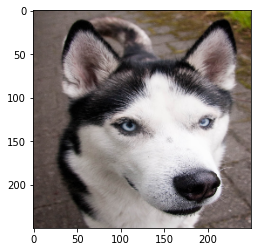

In [ ]:
#imagen resultado que tiene mas similitud con la imagen de entrada.
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(imagen_resultado)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

**IMAGEN ENTRADA POR EL USUARIO **

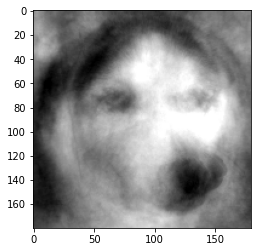

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(imagen_resultado_eigen)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

https://medium.com/@ashukumar27/similarity-functions-in-python-aa6dfe721035

https://www.geeksforgeeks.org/measure-similarity-between-images-using-python-opencv/

https://towardsdatascience.com/find-similar-images-using-autoencoders-315f374029ea
